In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from matplotlib.pyplot import figure
np.set_printoptions(suppress=True)

In [2]:
def find_output(X):
    Y= np.add(np.add(np.add(X[:,0:1],X[:,1:2]*X[:,1:2],X[:,2:3]),np.add(X[:,3:4],np.sin(X[:,4:5]),X[:,5:6])),np.add(np.add(7*X[:,6:7],8*np.exp(X[:,7:8]),X[:,8:9]),X[:,9:10]))
    Y=activate_sigmoid(Y)
    return Y

In [3]:
def activate_sigmoid(sum):
    return (2/(1+np.exp(-sum))-1)

In [4]:
X = np.random.uniform(-1,1,(1000,10))
Y = find_output(X)

In [5]:
 def print_network(net):
    for i,layer in enumerate(net,1):
        print("Layer {} ".format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

In [6]:
def initialize_network():
    input_neurons=len(X[0])
    hidden_neurons=input_neurons+1
    output_neurons=1
    n_hidden_layers=1
    net=list()
    for h in range(n_hidden_layers):
        if h!=0:
            input_neurons=len(net[-1])
            
        hidden_layer = [ { 'weights': np.random.uniform(size=input_neurons)} for i in range(hidden_neurons) ]
        net.append(hidden_layer)
    
    output_layer = [ { 'weights': np.random.uniform(size=hidden_neurons)} for i in range(output_neurons)]
    net.append(output_layer)
    
    return net

In [7]:
net=initialize_network()
print_network(net)

Layer 1 
neuron 1 : {'weights': array([0.76107052, 0.82142593, 0.16258632, 0.41669716, 0.76048844,
       0.36311467, 0.3585531 , 0.97203214, 0.69966967, 0.6248929 ])}
neuron 2 : {'weights': array([0.81479636, 0.32556313, 0.79449214, 0.64398725, 0.82459841,
       0.48993803, 0.61419281, 0.42956975, 0.15422226, 0.89090139])}
neuron 3 : {'weights': array([0.44932834, 0.77506772, 0.68551118, 0.43383987, 0.61522679,
       0.48942166, 0.32686399, 0.61598457, 0.43166881, 0.85766455])}
neuron 4 : {'weights': array([0.46320704, 0.46486962, 0.66198802, 0.50489733, 0.27287543,
       0.02044988, 0.7520657 , 0.85861616, 0.55114061, 0.69073796])}
neuron 5 : {'weights': array([0.21633441, 0.83330725, 0.69009615, 0.25050395, 0.74211267,
       0.1642097 , 0.67083418, 0.14333653, 0.21018429, 0.39569691])}
neuron 6 : {'weights': array([0.46163103, 0.05953654, 0.22233992, 0.13213917, 0.36112211,
       0.70631485, 0.68891117, 0.72894661, 0.45773421, 0.63859008])}
neuron 7 : {'weights': array([0.79513

In [8]:
def forward_propagation(net,input):
    row=input
    for layer in net:
        prev_input=np.array([])
        for neuron in layer:
            sum=neuron['weights'].T.dot(row)
            
            result=activate_sigmoid(sum)
            neuron['result']=result
            prev_input=np.append(prev_input,[result])
        row=prev_input
    return row

In [9]:
def sigmoidDerivative(output):
    return (0.5*(1.0-output*output))

In [10]:
def back_propagation(net,row,expected):
     for i in reversed(range(len(net))):
            layer=net[i]
            errors=np.array([])
            if i==len(net)-1:
                results=[neuron['result'] for neuron in layer]
                errors = expected-np.array(results)
            else:
                for j in range(len(layer)):
                    herror=0
                    nextlayer=net[i+1]
                    for neuron in nextlayer:
                        herror+=(neuron['weights'][j]*neuron['delta'])
                    errors=np.append(errors,[herror])
            
            for j in range(len(layer)):
                neuron=layer[j]
                neuron['delta']=errors[j]*sigmoidDerivative(neuron['result'])

In [11]:
def updateWeights(net,input,lrate):
    
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]

        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]

In [12]:
def training(net, epochs,lrate,n_outputs):
    errors=[]
    for epoch in range(epochs):
        sum_error=0
        for i,row in enumerate(X):
            outputs=forward_propagation(net,row)
            sum_error+=0.5*(math.pow((Y[i]-outputs),2))
            back_propagation(net,row,Y[i])
            updateWeights(net,row,0.05)
        errors.append(sum_error)
    return errors

In [13]:
errors=training(net,100, 0.01,1)

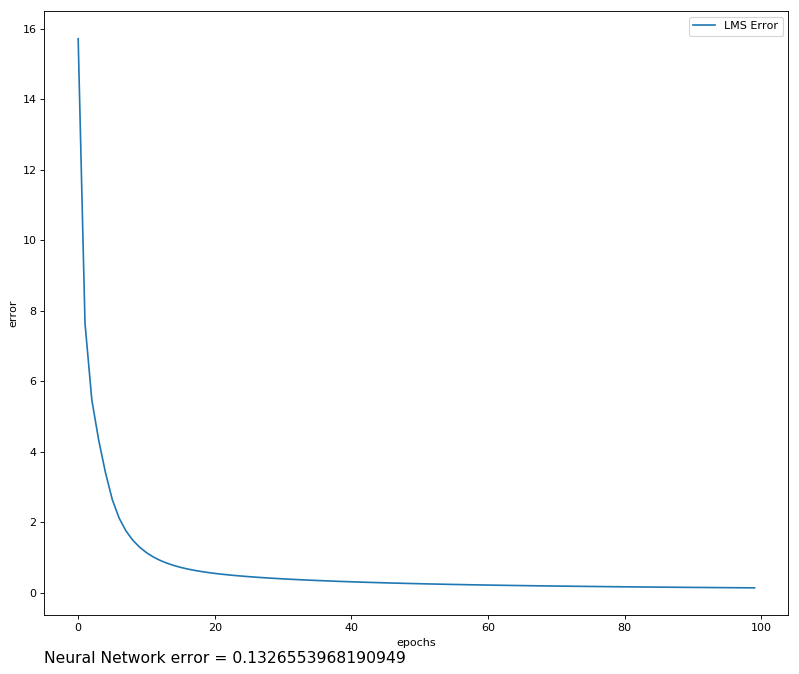

In [14]:
epochs = []
for i in range(100):
    epochs.append(i)

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(epochs,errors)
plt.xlabel("epochs")
plt.ylabel('error')
textstr = 'Neural Network error = '+str(errors[99])
plt.text(-5, -2, textstr, fontsize=14)

plt.legend(['LMS Error'])
plt.show()


In [15]:
def predict(network, row):
    outputs = forward_propagation(net, row)
    return outputs

In [18]:
Xpred = np.random.uniform(-1,1,(15,10))
Ypred = find_output(Xpred)
predarr=[]
for i,row in enumerate(Xpred):
    pred=predict(net,row)
    output=(pred)
    predarr.append(pred)

In [23]:
epochs = []
for i in range(100):
    epochs.append(i)

# figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
# plt.subplot(epochs,errors)
# plt.xlabel("epochs")
# plt.ylabel('error')
# textstr = 'Neural Network error = '+str(errors[99])
# plt.text(-5, -2, textstr, fontsize=14)

# plt.legend(['LMS Error'])
# plt.plot()

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
epochs = []
Y12 = []
X12 = []
for i in range(15):
    epochs.append(i)
    Y12.append(Ypred[i])
    X12.append(X[i])
plt.subplot(epochs, Y12)
plt.subplot(epochs, predarr)
plt.legend(['Actual', 'Predicted'])
plt.plot()


TypeError: unhashable type: 'numpy.ndarray'

<Figure size 960x800 with 0 Axes>